# Project: Wrangling and Analyze Data

## Title: RateDogs Twitter Data 


# Table of Contents

1. [Data Gathering](#gathering)       ---<a id="top"></a>


2. [Assessing Data](#assessing)

    * [Twitter archive](#archive)
    * [Image Prediction](#image)
    * [Tweet Data from Screen Scraping](#retweetscrap)
    
    
3. [Cleaning Data](#cleaning)                 

     * [Quality Issue](#quality)
     * [Tidiness Issue](#tidiness)
     * [Quality Issue 1](#qi1)
     * [Quality Issue 2](#qi2)
     * [Quality Issue 3](#qi3)
     * [Quality Issue 4](#qi4)
     * [Quality Issue 5](#qi5)
     * [Quality Issue 6](#qi6)
     * [Quality Issue 7](#qi7)
     * [Quality Issue 8](#qi8)
     * [Tidiness Issue 1](#ti1)
     * [Tidiness Issue 2](#ti2)
     
4. [Storing Data](#sd)


5. [Analyzing and Visualizing Data](#aandv)

## 1. Data Gathering<a id="gathering"></a>


#### 1.1 Import libararies and download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets read it in
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None



#### 1.2 Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Access file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
response

<Response [200]>

In [4]:
# Test
response.content[:50]

b'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_c'

In [5]:
#with open('image_predictions.tsv', mode='wb') as file:
    #file.write(response.content)

import os

folder_name = "image-predictions"
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
image = pd.read_csv('image_predictions.tsv',  sep='\t')
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True



#### 1.3 We use the given tweet-json.txt provided by udacity, cause the developer account was not granted me by tweeter

In [7]:
import json
import tweepy
import time

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
#read json file into a DataFrame and review
# read the json file line by line into a dataframe
frame_list = []
with open('tweet-json.txt') as open_file:
    for line in open_file.readlines():
        tweet_id = json.loads(line)['id']
        retweet_count = json.loads(line)['retweet_count']
        favorite_count = json.loads(line)['favorite_count']
        frame_list.append([int(tweet_id), retweet_count, favorite_count])

columns = ['tweet_id', 'retweet_count', 'favorite_count']
retweet = pd.DataFrame(data = frame_list, columns = columns)
retweet.sample()

,tweet_id,retweet_count,favorite_count
136,866094527597207552,8952,0


[Back to the top](#top)

## 2. Assess The Data<a id="assessing"></a>

The three data frames are:

* twitter_archive_enhanced.csv renamed **archive:**
* image_predictions.tsv renamed **image**
* tweet-json.txt renamed **retweet**

#### We now have data from our 3 data source and will assess the data to continue the Data Wrangling process.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

[Back to the top](#top)



### File #1: Archive<a id="archive"></a>
## Twitter Info

**archive** (Twitter archive) columns:

* **tweet_id:** the unique identifier for each tweet
* **in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
* **in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
* **timestamp:** time when this Tweet was created
* **source:** utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
* **text:** actual UTF-8 text of the status update
* **retweeted_status_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
* **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
* **retweeted_status_timestamp:** time of retweet
* **expanded_urls:** tweet URL
* **rating_numerator:** numerator of the rating of a dog. Note: ratings almost always greater than 10
* **rating_denominator:** denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
* **name:** name of the dog
* **doggo:** one of the 4 dog "stage"
* **floofer:** one of the 4 dog "stage"
* **pupper:** one of the 4 dog "stage"
* **puppo:** one of the 4 dog "stage"

In [11]:
# let view the Tweet archive
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [12]:
archive.shape

(2356, 17)

In [13]:
# lets view few of the tweets
pd.set_option('display.max_colwidth', -1)
archive['text'].head(5)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

we will have to fix the url wthin this text column later

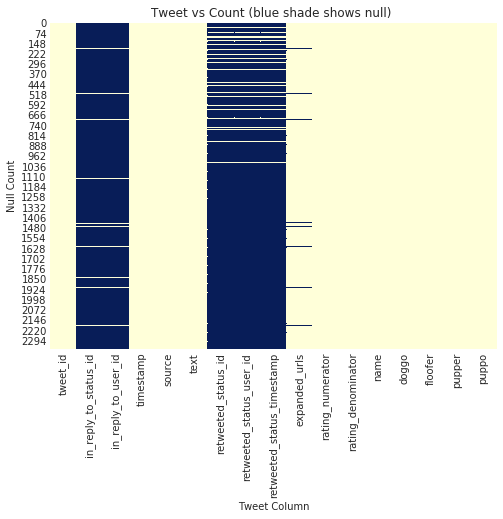

In [14]:
# Get a graphical look at nulls. 
#This will view columns with missing data
#plt.xlabel("Colors")
#plt.ylabel("Values")
#plt.title("Colors vs Values") 
#plt.show(fig)

plt.figure(figsize=(8,6))
fig = sns.heatmap(archive.isnull(), cbar=False, cmap="YlGnBu");
plt.xlabel("Tweet Column")
plt.ylabel("Null Count")
plt.title("Tweet vs Count (blue shade shows null) ") 
plt.show(fig)

In [15]:
# lets check the datatypes 
archive.info(), # total missing values for each features
archive.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

we can see some datatypes need to be fixed. "In reply" and "retweet" columns are missing a lot of data and the missing values

In [16]:
# Some names have word like "a" or "the". we need to address , lets know if the number is significant
print ('There are', archive.name.str.islower().sum(), 'names with a or and')

There are 109 names with a or and


In [17]:
#its good at this point to check the statistical summary of the "archive" dataset
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# lets check if the 10 that is the standard rating_denominator, is all so system
archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

we see there are over 20 records that are other numbers that 10, this could be errors or just part of exuberant and/or tongue-in-cheek rating since the handle is mainly for fun

In [17]:
# the numerator can variety of values even more than 10, however lets check it
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

numbers like 666, 960, 1776 might be errors. Since the numerator can be more than 10 which is considered as part of fun, we will leave these. 

In [19]:
#lets check the utility or source mostly used
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

we can see the main utility is iphone but the urls are easily readable; we will work on this.

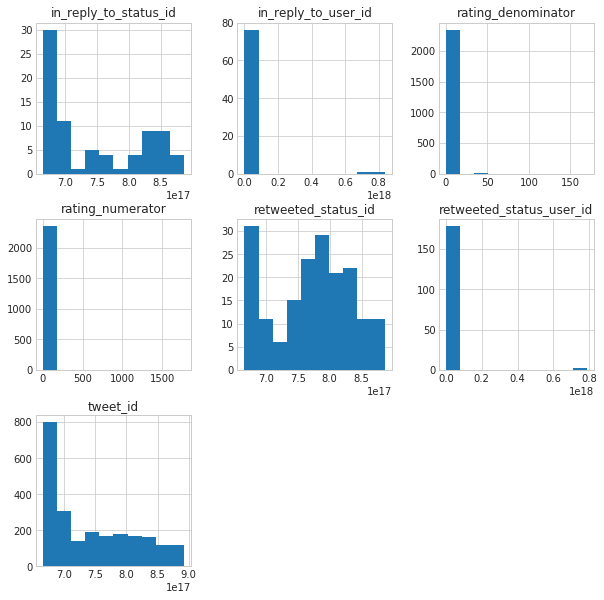

In [20]:
#its good to have pictorial view of the whole dataset before cleaning
archive.hist(figsize=(10,10));

[Back to the top](#top)

### File #2: Image Predictions<a id="image"></a>
**image:**  Tweet image predictions columns:

* **tweet_id:** the unique identifier for each tweet
* **jpg_url:** dog's image URL
* **img_num:** the image number that corresponds to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
* **p1:** algorithm's #1 prediction for the image in the tweet
* **p1_conf:** how confident the algorithm is in its #1 prediction
* **p1_dog:** whether or not the #1 prediction is a breed of dog
* **p2:** algorithm's #2 prediction for the image in the tweet
* **p2_conf:** how confident the algorithm is in its #2 prediction
* **p2_dog:** whether or not the #2 prediction is a breed of dog
* **p3:** algorithm's #3 prediction for the image in the tweet
* **p3_conf:** how confident the algorithm is in its #3 prediction
* **p3_dog:** whether or not the #3 prediction is a breed of dog

In [21]:
#lets view this dataset
image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Shetland_sheepdog            18 
teddy                        18 
Maltese_dog                  18 
beagle                       18 
Eskimo_dog                   18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [24]:
# lets view summary information about the dataset
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


all variables have 2075 records; no missing values here

In [25]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


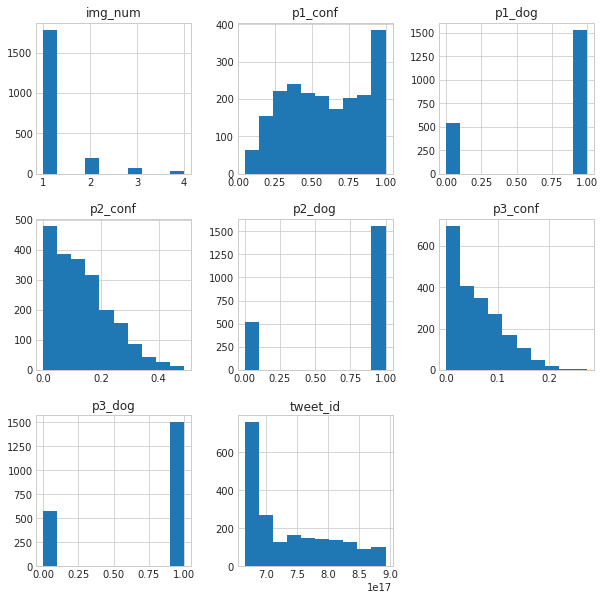

In [26]:
#its good to have pictorial view of the whole dataset before cleaning
image.hist(figsize=(10,10));

[Back to the top](#top)

### File #3: Tweet Data from Screen Scraping<a id="retweetscrap"></a>
**retweet**; (tweet status) columns:

* **favorite_count:** indicates approximately how many times this Tweet has been liked by Twitter users
* **retweet_count:** number of times this Tweet has been retweeted
* **tweet_id:** the unique identifier for each tweet

In [27]:
#lets view the dataset
retweet.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [28]:
retweet.tail(3)

,tweet_id,retweet_count,favorite_count
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [29]:
# Top 6 retweet_count records
retweet.sort_values(['retweet_count'], ascending= 0)[0:6]

,tweet_id,retweet_count,favorite_count
1037,744234799360020481,79515,131075
259,842892208864923648,56625,0
533,807106840509214720,56625,107015
816,770743923962707968,52360,0
1077,739238157791694849,52360,75163
412,822872901745569793,48265,132810


In [30]:
# lets check dulicate and drop
retweet.drop_duplicates()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [31]:
retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


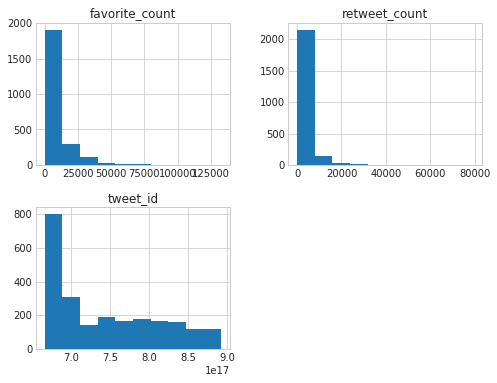

In [32]:
retweet.hist(figsize=(8,6));

[Back to the top](#top)

### End of assessment



A few observations:

* The dog name column has a variety of issues like missing name, identifiers like "a" or "the", also found that sometimes changes are made to owners dog name to something else. A real controversy! (https://slate.com/technology/2018/06/weratedogs-twitter-account-criticized-for-renaming-dogs.html) As we can see, that was done to influence potential "voting" based on dog name. this brings some deeper thoughts on the influence of the veracity of data on social media.

    The maor thing we want to analyze are most popular names, but it's worth noting this in terms of the data. I think it would be interesting to be able to know if the dog name was changed.


* There are lots of potential qualities and tideness issues. However, for the sake of this project, we will analyze 2 tidy and 8 qualities. Knowing potential impact that Tweets have as a sort of social barometer, it's worth noting that there is a lot of work that can be done on both the quality and veracity of this data.

[Back to the top](#top)

# 3. Cleaning Data<a id="cleaning"></a>
In this section, clean **all** of the issues you documented while assessing. 

The three data frames are

* archive:
* image:
* retweet:

## Quality issues<a id="quality"></a>
archive table
   1. There are some rows that have "retweet_status_values", which means a duplicate tweet. The need to be removed.
   * Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". For this analysis, these columns are not needed so will be dropped. FYI, all of these columns had missing data at 90% and above.
   
   * Different tweet_id count from df_image (suggests some tweets in
df_archive do not have images)
      
   * The datatype of "timestamp" needs to be changed.
   * We will change the long url links to more readable values
   * The standard for "rating_denominator" is 10, but it includes some other numbers, we have to work on this.
   * Remove url from text column to be more readable.
   * The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.
   * Drop all columns except for `tweet_id`, `jpg_url`, and `p1` for the image dataset


image table

* The columns' names are not clear and straightforward such as p1, p2. we have to rename them
* The prediction dog breeds involve both uppercase and lowercase for the first letter. 

Note: I identified the table names with some quality issue, however we are merging the three tables into a single table, so the image table cleaning will be done on that merged table.

[Back to the top](#top)

### Tidiness Issues<a id="tidiness"></a>
        1. Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one column called "stage".
        2. The retweet table and image table need to merge into the archive table.
   
Both following the recommendations of the "Tidy Data" paper by Hadly Wickham. "Each variable is a column and each observation is a row.



image table 

The columns'names are not clear and straightforward such as p1,p2. Rename to something easier
The prediction dog breeds involve both uppercase and lowercase for the first letter.
Note: I identified the table names where I saw the quality issue, however since I'll be doing a merge of the three tables into a single table, the image prediction tables cleaning will be done on that merged table.

In [33]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image.copy()
retweet_clean = retweet.copy()

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [35]:
#  a lot of  "none" values in the "doggo" column, but wanted to make sure I have the 
# count.
# Not a lot of the dog stage provided, but still a good field for further analysis
archive_clean.doggo.value_counts(), archive_clean.floofer.value_counts(), archive_clean.pupper.value_counts(), archive_clean.puppo.value_counts()

(None     2259
 doggo    97  
 Name: doggo, dtype: int64, None       2346
 floofer    10  
 Name: floofer, dtype: int64, None      2099
 pupper    257 
 Name: pupper, dtype: int64, None     2326
 puppo    30  
 Name: puppo, dtype: int64)

a lot of values "none" in the "dog stage" column,  count. 97+10+257+30 = 394
Not a lot of the dog stage provided, but still a good field for further analysis

In [35]:
image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [36]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
retweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


[Back to the top](#top)

### Quality Issue 1:<a id="qi1"></a>


#### Define:
If "retweeted_status_id" contains a non-null, that is a duplicated tweet. Need to remove these before the merge

#### Code

In [37]:
# Total number of tweets including retweets
archive_clean.shape[0]

2356

In [38]:
# Get nulls and clean

print ('there are',len(archive_clean[archive_clean.retweeted_status_id.isnull() == False]), 'number of retweets')

there are 181 number of retweets


In [40]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [39]:
# Boolean masking to filter out retweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()== True]

In [40]:
# Total number of tweets including retweets
archive_clean.shape[0]

2175

In [41]:
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

[Back to the top](#top)

### Issue #2:
-  archive: Unnecessary columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp`)

#### Issue #2 - Define:
- Drop unnecessary columns

#### Code

In [42]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [45]:
# Drop unnecessary columns
unnecessary_columns = ["in_reply_to_status_id", 
                       "in_reply_to_user_id", 
                       "retweeted_status_id", 
                       "source", 
                       "retweeted_status_id", 
                       "retweeted_status_user_id",
                       "retweeted_status_timestamp"]

archive_clean = archive_clean.drop(unnecessary_columns, axis=1) 

In [43]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

[Back to the top](#top)

### Quality Issue 3<a id="qi3"></a>
Define : Remove the records with no images information ('expanded_urls' is NaN)

In [44]:
string1 = archive_clean.tweet_id.count()
print("There are {} unique 'tweet_id' in the 'df_archive' table".format(string1))

There are 2175 unique 'tweet_id' in the 'df_archive' table


In [45]:
string2 = image_clean.tweet_id.count()
print("There are {} unique 'tweet_id' in the 'df_image' table".format(string2))

There are 2075 unique 'tweet_id' in the 'df_image' table


In [46]:
string3 = archive_clean.tweet_id.isin(image_clean.tweet_id).sum()
print("There are {} unique 'tweet_id' that are common in both the 'df_archive' and 'df_image' table".format(string3))

There are 1994 unique 'tweet_id' that are common in both the 'df_archive' and 'df_image' table


In [47]:
# Align df_archive_clean with df_image_clean
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)]

# Align df_image_clean with df_archive_clean
image_clean = image_clean[image_clean.tweet_id.isin(archive_clean.tweet_id)]

In [48]:
print ('there are', archive_clean.expanded_urls.isnull().sum(), 'number of records without images')

there are 0 number of records without images


In [49]:
string2 = image_clean.tweet_id.count()
print("There are {} unique 'tweet_id' in the 'df_image' table".format(string2))

There are 1994 unique 'tweet_id' in the 'df_image' table


In [50]:
string1 = archive_clean.tweet_id.count()
print("There are {} unique 'tweet_id' in the 'df_archive' table".format(string1))

There are 1994 unique 'tweet_id' in the 'df_archive' table


[Back to the top](#top)

### Quality Issue 4<a id="qi4"></a>
Define : Change the datatype of 'timestamp' to datetime

#### Code

In [51]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [52]:
archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

[Back to the top](#top)

### Quality Issue 5<a id="qi5"></a>
Define : - df_archive: `text` column contains hyperlink info (starting with ‘https’).

Remove hyperlink data from `text` column in the `df_archive` dataframe using regex and string splitting.

In [53]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [54]:
# Check if 'text' columns contain URLs (should be "False")
string = archive_clean.text.str.contains(r'\shttps.+$').describe()[2]
print("Does the `text` column contain URLs that should be removed?: {}".format(string))

Does the `text` column contain URLs that should be removed?: True


In [58]:
# Precleaning check
list(archive_clean.text)[:2]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"]

In [59]:
# Remove URLs
archive_clean["text"] = archive_clean.text.str.split(r'\shttps.+$', expand=True)

In [60]:
# Check if 'text' columns contain URLs (should be "False")
string = archive_clean.text.str.contains(r'\shttps.+$').describe()[2]
print("Does the `text` column contain URLs that should be removed?: {}".format(string))

Does the `text` column contain URLs that should be removed?: False


#### Test

In [61]:
# Postcleaning check
list(archive_clean.text)[:2]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"]

In [62]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


[Back to the top](#top)

### Quality Issue 6<a id="qi6"></a>
Define : 10 is the standard value for denominator for WeRateDogs. 

lets set an arbitrary cut off point, like anything > 100, since some rankings are "out of 100"
Then we create a ratio where every numerator set to 10

In [63]:
# Precleaning check
archive_clean[["rating_numerator", "rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,1994.000000,1994.000000
mean,12.280843,10.532096
std,41.497718,7.320710
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#### Code

In [64]:
# We've got a lot of ratings > 10, but not a crazy number of them so we can handle selectively
archive_clean.rating_denominator.value_counts()

10     1976
50     3   
80     2   
11     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

95% of the tweets have ratings between 4.0 and 14.0.


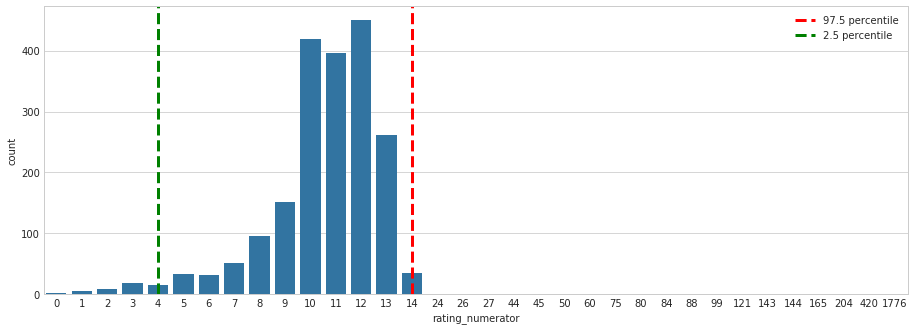

In [65]:
# Identify upper and lower bounds for assumed outliers
lower = archive_clean["rating_numerator"].quantile(0.025)
upper = archive_clean["rating_numerator"].quantile(0.975)
txt= "95% of the tweets have ratings between {} and {}."
print(txt.format(lower,upper))

# Create a countplot to visually explore the distribution of irregular numerators
fig= plt.figure()
ax = fig.add_axes([.125, .125, 2, 1])
base_color = sns.color_palette()[0]
sns.countplot(data = archive_clean, x = "rating_numerator", color = base_color, ax = ax)

# Add vertical bars to show upper and lower bounds
ax.axvline(x = upper, label= "97.5 percentile", color = "r", linestyle='--', linewidth=3)
ax.axvline(x = lower, label= "2.5 percentile", color = "g", linestyle='--', linewidth=3)

ax.legend()
plt.show()

In [66]:
df1_tmp = archive_clean[archive_clean['rating_denominator'] != 10]
archive_clean = archive_clean.drop(df1_tmp.index, axis=0)

#### Test

In [67]:
archive_clean.rating_denominator.value_counts()

10    1976
Name: rating_denominator, dtype: int64

#### Numerator Issues
Decided to keep the numerators. Have a common base for the denominator is good for keeping a common look to the denominator. I think the numerator values, to keep with the theme of showing owner pride (exhuberance).

#### Code

In [68]:
archive_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       150
8       95 
7       51 
14      35 
5       33 
6       32 
3       19 
4       15 
2       9  
1       4  
0       2  
420     1  
26      1  
27      1  
75      1  
1776    1  
Name: rating_numerator, dtype: int64

In [69]:
#after_cleaning check
archive_clean[["rating_numerator", "rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,1976.000000,1976.0
mean,11.698381,10.0
std,40.851248,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


we can see the maximum is 1776, I am leaving this cause this is the fun of the WeRateDogs channel to make the numerator more than the denorminator

[Back to the top](#top)

### Quality Issue 7<a id="qi7"></a>
Define: Change prediction field names to more readable values
#### Code

In [70]:
archive_clean= archive_clean.rename(columns={'p1':'Breed_Probability1', 'p2':'Breed_Probability2', 'p3':'Breed_Probability3'})
archive_clean= archive_clean.rename(columns={'p1_conf':'Breed_Confidence1', 'p2_conf':'Breed_Confidence2', 'p3_conf':'Breed_Confidence3'})
archive_clean= archive_clean.rename(columns={'p1_dog':'Dog_Flag_1', 'p2_dog':'Dog_Flag_2', 'p3_dog':'Dog_Flag_3'})

In [71]:
archive_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None


[Back to the top](#top)

### Quality Issue 8<a id="qi8"></a>
Define: Dog Names should be cleaned up.
Some dog names were null.

Also, the first names that start with a lower case is something other than the actual name.  so we will clean those names that start with a lower case

#### Code

In [72]:
# Isolate entries of "None" in the `name` column and subset the `name` and `text` columns for easier viewing
None_names = archive_clean.query('name == "None"')[["name","text"]]
None_names.head()

,name,text
5,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
7,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
12,None,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10
24,None,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo)
25,None,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof


In [73]:
string4 = None_names.count()[0]
print("There are {} entries with 'None' entered as the dog's name.".format(string4))

There are 534 entries with 'None' entered as the dog's name.


In [74]:
#lets check other values starting with a capital letter
pd.set_option('display.max_colwidth', -1)
lc_vals = archive_clean[~archive_clean['name'].str[0].str.isupper()]['name'].value_counts()
lc_vals.keys()

Index(['a', 'the', 'an', 'very', 'one', 'just', 'quite', 'getting',
       'unacceptable', 'space', 'incredibly', 'by', 'his', 'light',
       'officially', 'infuriating', 'not', 'my', 'all', 'such', 'actually'],
      dtype='object')

we will take out 'a', 'an', and 'the', since they might actually be part of the dogs name. 


In [75]:
for val in lc_vals.keys():
    archive_clean['name'] = archive_clean['name'].replace(val,'None')
    
archive_clean['name'] = archive_clean['name'].replace('a','None')
archive_clean['name'] = archive_clean['name'].replace('an','None')
archive_clean['name'] = archive_clean['name'].replace('the','None')

#### Test

In [76]:
archive_clean['name'].value_counts()

None          629
Charlie       11 
Lucy          10 
Oliver        10 
Cooper        10 
Penny         9  
Tucker        9  
Winston       8  
Sadie         8  
Toby          7  
Lola          7  
Daisy         7  
Jax           6  
Koda          6  
Stanley       6  
Bo            6  
Bella         6  
Leo           5  
Oscar         5  
Milo          5  
Louis         5  
Scout         5  
Rusty         5  
Chester       5  
Bailey        5  
Dave          5  
Buddy         5  
Bear          4  
Oakley        4  
Bentley       4  
             ..  
Filup         1  
Sweet         1  
Reptar        1  
Oshie         1  
Bloo          1  
Callie        1  
Lenox         1  
Roscoe        1  
Remy          1  
Terrance      1  
Kuyu          1  
Chef          1  
Fwed          1  
Tove          1  
Stella        1  
Ronnie        1  
River         1  
Pip           1  
Willow        1  
Eazy          1  
Newt          1  
Petrick       1  
Jazzy         1  
Brandonald    1  
Pepper    

[Back to the top](#top)

### Quality Issue 9 - Define:
- Drop all columns except for `tweet_id`, `jpg_url`, and `p1`
- Rename 'p1' to 'breed' 

__Note__: For the time being, all other image prediction data are beyond the scope of this project so should be dropped.

#### Code

In [77]:
#  Precleaning check
list(image_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [78]:
image_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [79]:
# Subset out unnecessary columns
image_clean = image_clean[['tweet_id', 'jpg_url', 'p1']]

In [80]:
 #Rename column
image_clean = image_clean.rename(columns = {"p1":"Probabilty1_breed"})

In [81]:
# Postcleaning check
list(image_clean.columns)

['tweet_id', 'jpg_url', 'Probabilty1_breed']

In [82]:
image_clean.head(3)

,tweet_id,jpg_url,Probabilty1_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd


[Back to the top](#top)

## archive table
### Tidiness Issue 1:<a id="ti1"></a>

* - archive_clean: Variables as column headers (`doggo`, `flooder`, `pepper`, `puppy`)

#### Issue 1 - Define:
- Extract dog stage names in `text` and, if found, add them to a new column `stage`

In [83]:
# Postcleaning check
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [84]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [85]:
# Extract dog stage names in `text` and, if found, add them to a new column `dog_stages`
archive_clean['stage'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [86]:
# Drop unnecessary columns
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [87]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

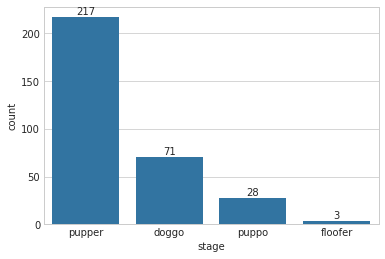

In [88]:
stage_count = archive_clean.stage.value_counts()
sns.countplot(data=archive_clean, x='stage', order=stage_count.index, color = base_color);

# Print value on each bar
for i in range (stage_count.shape[0]):
    count = stage_count[i]
    plt.text(i, count+11, count, ha = 'center', va='top')

[Back to the top](#top)

### Tidiness Issue 2<a id="ti2"></a>

- `retweet` + `image`: Share same observational unit as `archive` so they don't need to be separate dataframes

#### Issue #2 - Define:
- Merge `retweet_clean` to `archive_clean` to create `master_clean`
- Then Merge `image_clean` to `master_clean`

#### Issue #2 - Code

In [89]:
# Merge datasets to create `master_clean`

master_clean = pd.merge(archive_clean, retweet_clean, how="inner", on = "tweet_id")
master_clean = pd.merge(master_clean, image_clean, how="inner", on = "tweet_id")
master_clean.reset_index(drop=True, inplace=True)

In [90]:
# Confirm
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 18 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     1976 non-null datetime64[ns]
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1976 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
stage                         319 non-null object
retweet_count                 1976 non-null int64
favorite_count                1976 non-null int64
jpg_url                       1976 non-null object
Probabilty1_breed             197

In [91]:
# Confirm
master_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.976000e+03,2.200000e+01,2.200000e+01,0.0,0.0,1976.000000,1976.0,1976.000000,1976.000000
mean,7.360217e+17,6.984288e+17,4.196984e+09,NaN,NaN,11.698381,10.0,2769.273785,8921.050607
std,6.764193e+16,4.451659e+16,0.000000e+00,NaN,NaN,40.851248,0.0,4682.983010,12248.918997
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,10.0,16.000000,81.000000
25%,6.757942e+17,6.724855e+17,4.196984e+09,NaN,NaN,10.000000,10.0,622.750000,1956.750000
50%,7.084132e+17,6.756022e+17,4.196984e+09,NaN,NaN,11.000000,10.0,1354.500000,4141.000000
75%,7.881575e+17,7.032024e+17,4.196984e+09,NaN,NaN,12.000000,10.0,3224.250000,11339.750000
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,10.0,79515.000000,132810.000000


In [92]:
# Confirm
master_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,Probabilty1_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange


[Back to the top](#top)

#### End of cleaning

## 4. Storing Data<a id="sd"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [93]:
archive_clean.to_csv('twitter_archive_master.csv.csv', encoding='utf-8')

In [94]:
image_clean.to_csv('image_master.csv', index=False, encoding='utf-8')

## 5. Analyzing and Visualizing Data<a id="aandv"></a>



### 5.1 Insights:
1. What is the most retweeted tweet?

2. What is the most common rating?

3. What are the most common breeds found by the neural network?

4. How many tweet per month over the 3 years?

In [95]:
# 1. What is the most retweeted tweet?
most_retweeted = master_clean[master_clean["retweet_count"] == master_clean["retweet_count"].max()]
most_retweeted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,Probabilty1_breed
772,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever


In [96]:
list(most_retweeted["expanded_urls"])

['https://twitter.com/dog_rates/status/744234799360020481/video/1']

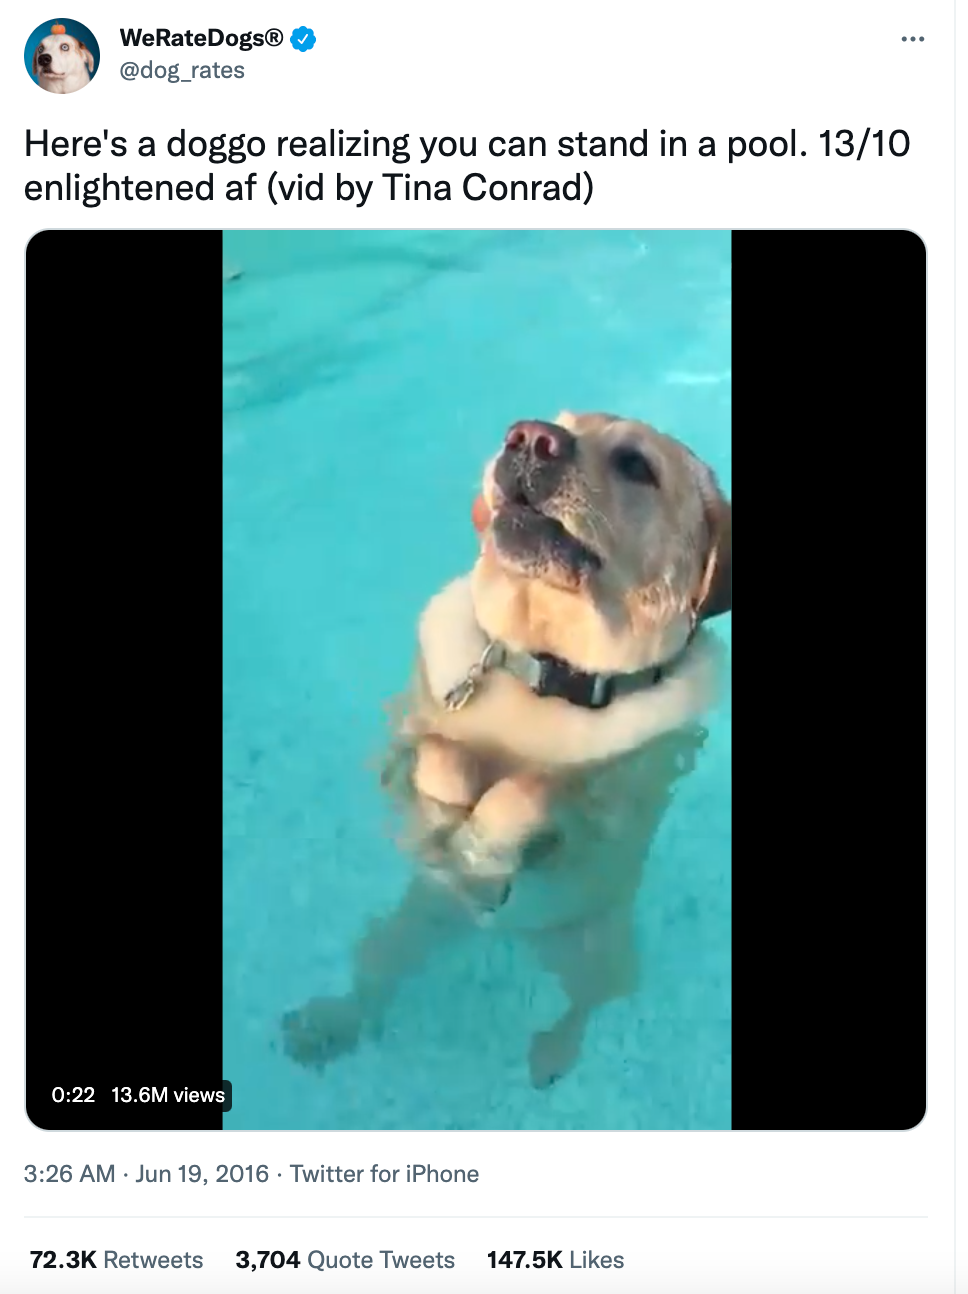

In [97]:
from IPython.display import Image
Image(filename='most_retweeted.png.png', width=500) 

In [98]:
list(most_retweeted["jpg_url"])[0]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [99]:
list(most_retweeted["text"])

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)"]

  **Answer:**  The most retweeted tweet is the tweet_id `744234799360020481' which features the following very good boy.

In [100]:
# 2. What is the most common rating?
common_rating = archive_clean["rating_numerator"].value_counts(normalize=True)
common_rating[:5]

12    0.227733
10    0.212045
11    0.200405
13    0.132085
9     0.075911
Name: rating_numerator, dtype: float64

**Answer**: The most common rating is 12/10 and that is 23% of the whole

In [101]:
# 3. What are the most common breeds found by the neural network?
common_breeds = master_clean["Probabilty1_breed"].value_counts()
common_breeds[:5]

golden_retriever      135
Labrador_retriever    92 
Pembroke              88 
Chihuahua             79 
pug                   54 
Name: Probabilty1_breed, dtype: int64

__Answer__: In order, the most common breeds identified by the neural network are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, and Pug.

In [108]:
# Code for Act_Report for image URLs for each dog breed

list(master_clean[master_clean["Probabilty1_breed"] == "pug"]["jpg_url"])[0]
list(master_clean[master_clean["Probabilty1_breed"] == "Chihuahua"]["jpg_url"])[0]
list(master_clean[master_clean["Probabilty1_breed"] == "Pembroke"]["jpg_url"])[0]
list(master_clean[master_clean["Probabilty1_breed"] == "Labrador_retriever"]["jpg_url"])[0]
list(master_clean[master_clean["Probabilty1_breed"] == "golden_retriever"]["jpg_url"])[0]

'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg'

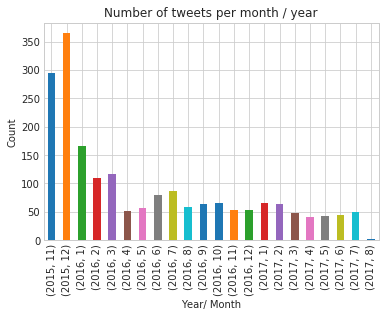

In [109]:
# 4.How many tweet per month?
timestamp_month = archive_clean.timestamp.dt.month
timestamp_year = archive_clean.timestamp.dt.year

tweets_per_month_year = archive_clean.groupby([timestamp_year,timestamp_month]).count().iloc[:, 0]


fig, ax = plt.subplots()
tweets_per_month_year.plot(kind='bar',ax=ax)
ax.set(xlabel="Year/ Month", ylabel="Count", title="Number of tweets per month / year");

__Answer__: December 2015

#### Other Analysis:

#### Basic check on dog stages

Text(0.5,1,'Dog Stage')

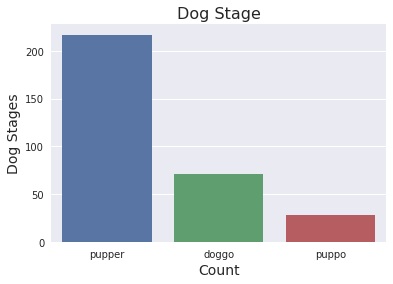

In [114]:
# Dog Stages
sorted_stage = archive_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('Dog Stage',fontsize=16)

[Back to the top](#top)

#### Analysis over time
We should see how things change between retweet and favorite over time

let's see the Tweets over time grouped by month.

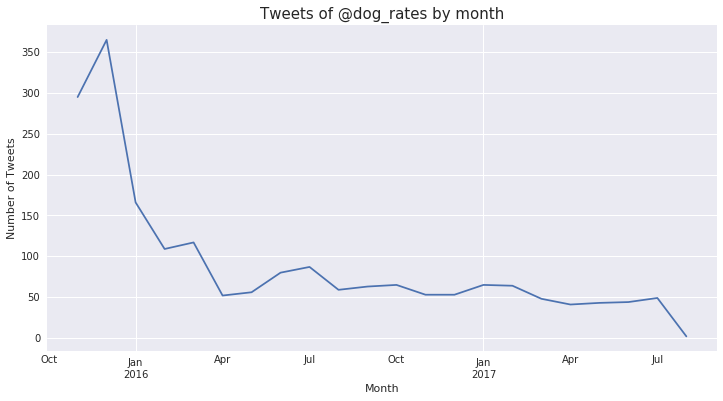

In [115]:
ax = archive_clean.timestamp.groupby(archive_clean.timestamp.dt.to_period('M')).agg('count').plot(figsize=(12,6))
ax.set_title('Tweets of @dog_rates by month').set_fontsize(15)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tweets');

Very interesting is that the number of Tweets dropped over time. Perhaps most of the Tweets are retweets now? Let's see the same plot from the original Data.

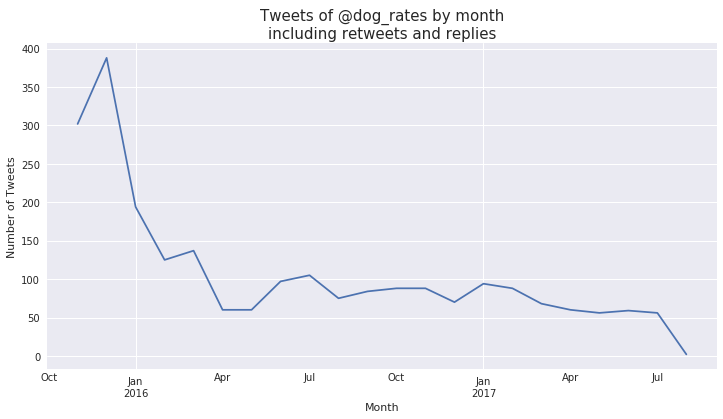

In [116]:
ax2 = archive.timestamp.astype('datetime64[ns]').groupby(archive.timestamp.astype('datetime64[ns]').dt.to_period('M')).agg('count').plot(figsize=(12,6))
ax2.set_title('Tweets of @dog_rates by month\nincluding retweets and replies').set_fontsize(15)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Tweets');

[Back to the top](#top)

The total number of Tweets is higher obviously but drops over time as well. How does that correlate with the popularity of this Twitter account?

#### Retweets over time

What about Retweets?


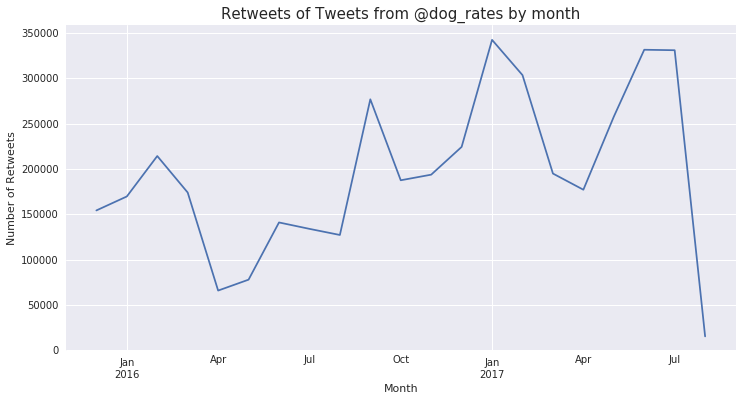

In [117]:
ax3 = master_clean.retweet_count.groupby(archive_clean.timestamp.dt.to_period('M')).agg('sum').plot(figsize=(12,6))
ax3.set_title('Retweets of Tweets from @dog_rates by month').set_fontsize(15)
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Retweets');

The total number of retweets per month has ups and downs with a trend upwards.

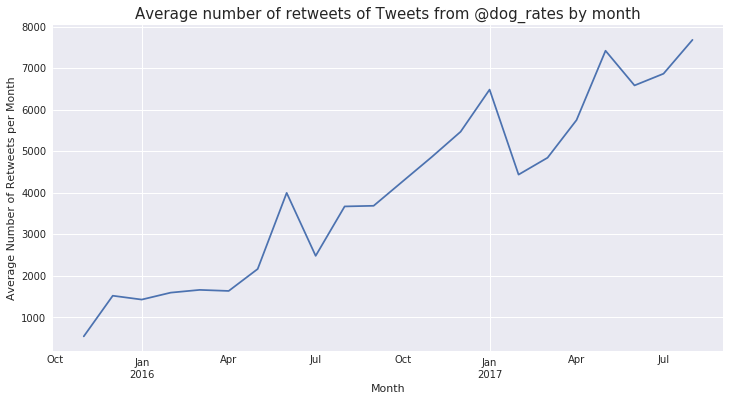

In [118]:
ax4 = master_clean.retweet_count.groupby(master_clean.timestamp.dt.to_period('M')).agg('mean').plot(figsize=(12,6))
ax4.set_title('Average number of retweets of Tweets from @dog_rates by month').set_fontsize(15)
ax4.set_xlabel('Month')
ax4.set_ylabel('Average Number of Retweets per Month');

This trend can be seen more clear in this plot. The average number of retweets raised over time. Obviously Twitter is very effective if one has lots' of followers. @dog_rates Tweets are retweeted alot.

#### Favorites over time

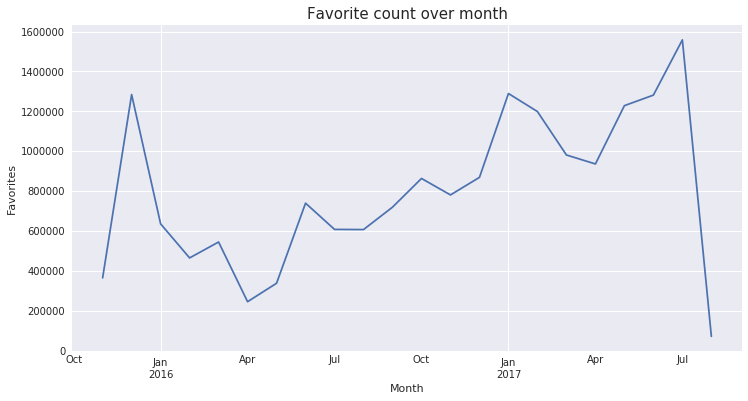

In [119]:
ax5 = master_clean.favorite_count.groupby(master_clean.timestamp.dt.to_period('M')).agg('sum').plot(figsize=(12,6))
ax5.set_title('Favorite count over month').set_fontsize(15)
ax5.set_xlabel('Month')
ax5.set_ylabel('Favorites');

As with retweets the trend upwards is visible. That's an effect that is expected because the more popular a Twitter account the more followers the more retweets and favorites.

Does that correlate with the number of favorites and retweets?

In [121]:
master_clean[master_clean.rating_numerator < 15][['favorite_count', 'retweet_count', 'rating_numerator']].corr()

,favorite_count,retweet_count,rating_numerator
favorite_count,1.000000,0.913053,0.406685
retweet_count,0.913053,1.000000,0.305102
rating_numerator,0.406685,0.305102,1.000000


We see the rating does not correlate that much with the number of retweets and favorite counts. That means that the rating itself does not explain the high numbers of retweets.

In contrast the number of retweets and favorites correlate strongly. 

This is expected because the more retweets the more people can favorite the tweet. And The more people favorite a Tweet the more they will retweet it.

**I think that the rating itself is not the gist of these tweets but the Tweet text itself. I think this is due to the sense of humor of @dog_rates and the text he comments every image.**

[Back to the top](#top)

### Some top 10 analysis

In [123]:
# Top 10 breeds
master_clean['Probabilty1_breed'].value_counts().head(10)

golden_retriever      135
Labrador_retriever    92 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               40 
toy_poodle            38 
Pomeranian            38 
malamute              29 
Name: Probabilty1_breed, dtype: int64

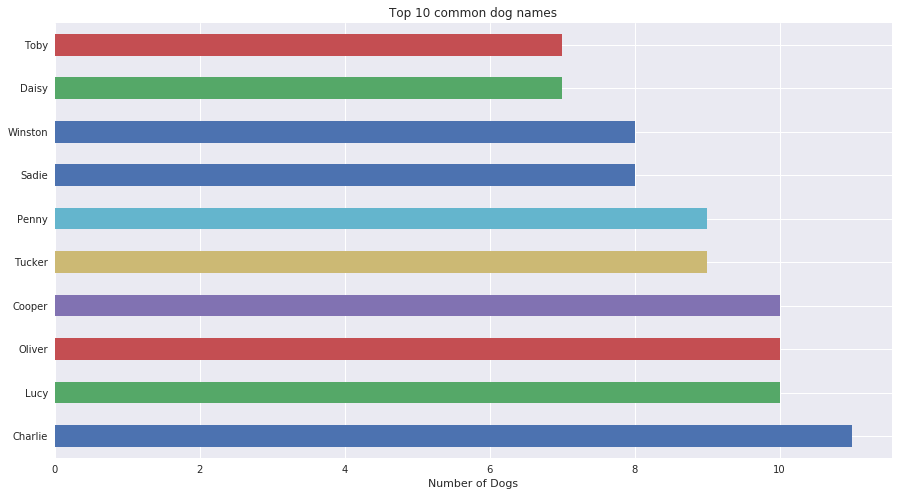

In [124]:
# Top 10 names with chart
master_clean.name.value_counts()[1:11].plot('barh', figsize=(15,8), title='Top 10 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

In [125]:
#Percentage of the top 10 Breeds count on the whole
top10_breeds_count = master_clean[master_clean.Probabilty1_breed != 'none'].Probabilty1_breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / master_clean.shape[0])
print("\nThe percentage of the Top 10 dog breeds is {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      135
Labrador_retriever    92 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               40 
toy_poodle            38 
Pomeranian            38 
malamute              29 
Name: Probabilty1_breed, dtype: int64

The percentage of the Top 10 dog breeds is 32% of all tweets


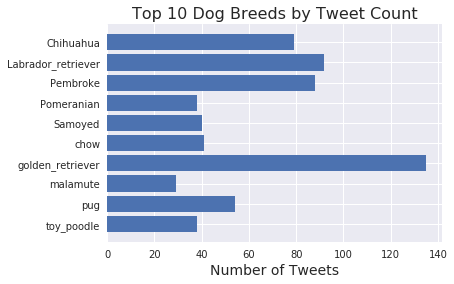

In [126]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

[Back to the top](#top)

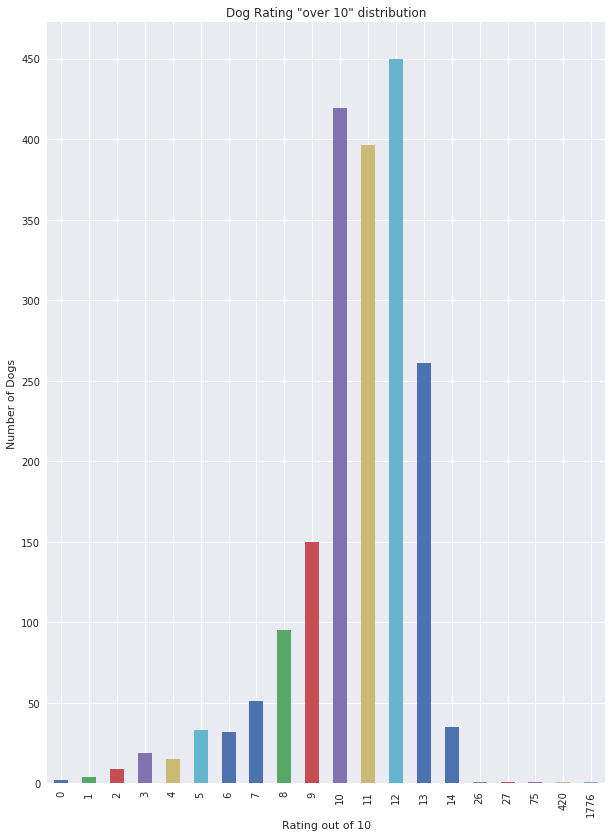

In [127]:
#  the "out of 10" scores looked
plt.figure(figsize=(10,14))
dog_rate = master_clean.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating "over 10" distribution')
dog_rate.set_xlabel("Rating out of 10")
dog_rate.set_ylabel("Number of Dogs")
dog_rate.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450]);
#plt.savefig('rating_dist');

In [128]:
archive_clean['stage'].value_counts()

pupper     217
doggo      71 
puppo      28 
floofer    3  
Name: stage, dtype: int64

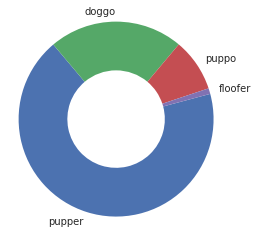

In [129]:
sns.set(style='darkgrid')
sorted_p1 = master_clean['stage'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 15, counterclock = False,
       wedgeprops = {'width': 0.5})
plt.axis('square');

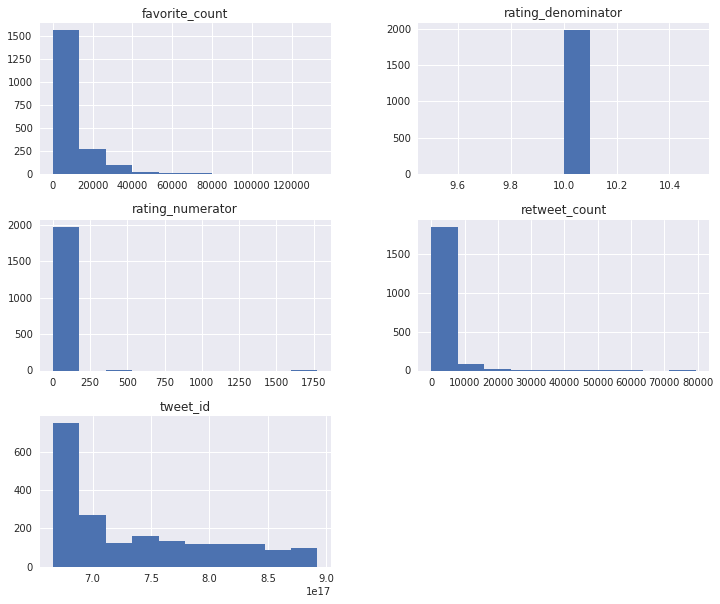

In [133]:
#its good to have pictorial view of the whole dataset 
master_clean.hist(figsize=(12,10));